
m1 = llama-3.3-70b-versatile(100-243)
m2 = meta-llama/llama-4-scout-17b-16e-instruct(514.102)
m3 = mistral-saba-24b(100-247,200-761)


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


In [17]:
df1 = pd.read_csv('C:/Users/91875/Desktop/ocean_scores_4002.csv')
df2 = pd.read_csv('C:/Users/91875/Desktop/meta200.csv')
df3 = pd.read_csv('C:/Users/91875/Desktop/mi400.csv')


In [37]:
from datasets import load_dataset

# Step 1: Load Hugging Face Pandora dataset
dataset = load_dataset("jingjietan/pandora-big5", split="train[:200]")
pandora = pd.DataFrame(dataset[:200])[["O", "C", "E", "A", "N"]]
pandora.columns = ['O', 'C', 'E', 'A', 'N']
pandora = pandora.reset_index(drop=True)


🔍 Average Cosine Similarity with Pandora:
Model 1 vs Ref: 0.7282365374605795
Model 2 vs Ref: 0.7315809289761674
Model 3 vs Ref: 0.7174043471242342

📊 Mean Absolute Differences with Pandora:
Model 1 vs Ref: [27.3625 36.7425 29.985  29.6425 34.54  ]
Model 2 vs Ref: [29.1125 30.8425 37.125  35.4725 31.64  ]
Model 3 vs Ref: [28.7225 31.4075 31.095  31.8275 32.88  ]


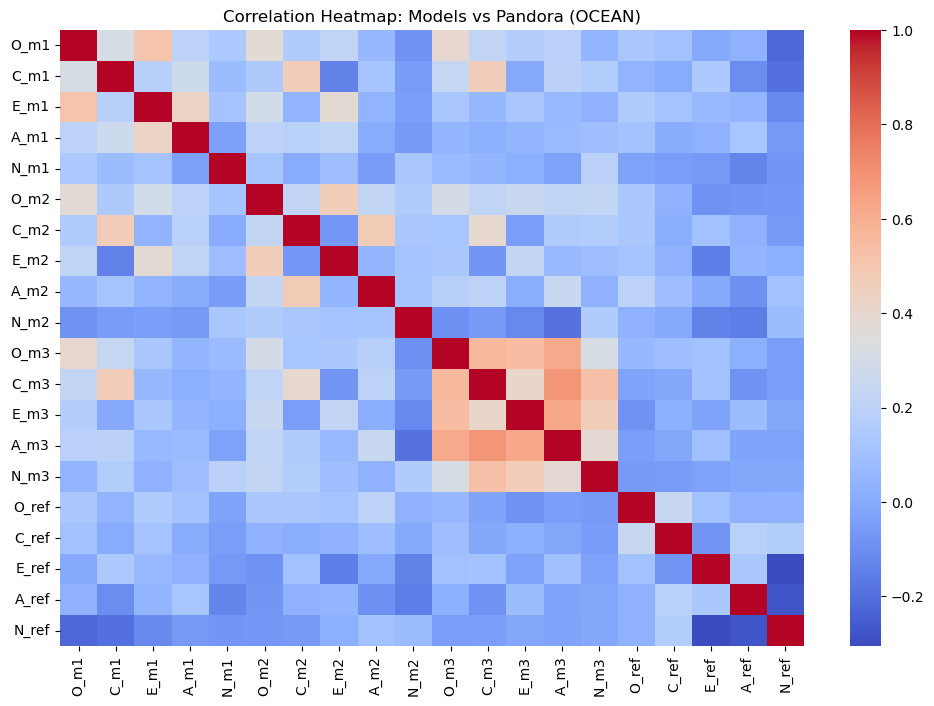

In [38]:
# pandora = pandora / 12
df1 = pd.read_csv('C:/Users/91875/Desktop/ocean_scores_4002.csv').iloc[:200].reset_index(drop=True)
df2 = pd.read_csv('C:/Users/91875/Desktop/meta200.csv').iloc[:200].reset_index(drop=True)
df3 = pd.read_csv('C:/Users/91875/Desktop/mi400.csv').iloc[:200].reset_index(drop=True)

# Step 3: Rename columns to track models
df1.columns = [col + '_m1' for col in df1.columns]
df2.columns = [col + '_m2' for col in df2.columns]
df3.columns = [col + '_m3' for col in df3.columns]
pandora.columns = [col + '_ref' for col in pandora.columns]

# Step 4: Merge all
merged = pd.concat([df1, df2, df3, pandora], axis=1)

# Step 5: Extract numpy arrays for similarity and difference
cols = ['O', 'C', 'E', 'A', 'N']
m1 = df1[[col + '_m1' for col in cols]].values
m2 = df2[[col + '_m2' for col in cols]].values
m3 = df3[[col + '_m3' for col in cols]].values
ref = pandora[[col + '_ref' for col in cols]].values

# Step 6: Cosine similarity with reference
print("\n🔍 Average Cosine Similarity with Pandora:")
print("Model 1 vs Ref:", np.mean(np.diag(cosine_similarity(m1, ref))))
print("Model 2 vs Ref:", np.mean(np.diag(cosine_similarity(m2, ref))))
print("Model 3 vs Ref:", np.mean(np.diag(cosine_similarity(m3, ref))))

# Step 7: Mean Absolute Differences
print("\n📊 Mean Absolute Differences with Pandora:")
print("Model 1 vs Ref:", np.mean(np.abs(m1 - ref), axis=0))
print("Model 2 vs Ref:", np.mean(np.abs(m2 - ref), axis=0))
print("Model 3 vs Ref:", np.mean(np.abs(m3 - ref), axis=0))

# Step 8: Correlation heatmap (merged)
plt.figure(figsize=(12, 8))
sns.heatmap(merged.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap: Models vs Pandora (OCEAN)')
plt.show()

<Axes: >

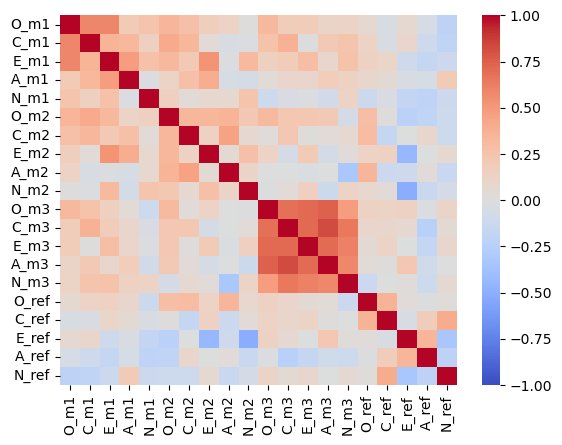

In [39]:
sns.heatmap(corr_df.corr(), cmap='coolwarm', annot=False, vmin=-1, vmax=1)



m1 = llama-3.3-70b-versatile
m2 = meta-llama/llama-4-scout-17b-16e-instruct
m3 = mistral-saba-24b


In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Trim reference data to match shape
df_pandora_trim = pandora[['O_ref', 'C_ref', 'E_ref', 'A_ref', 'N_ref']].iloc[:200].reset_index(drop=True)

traits = ['O', 'C', 'E', 'A', 'N']
suffixes = {'m1': '_m1', 'm2': '_m2', 'm3': '_m3', 'pandora': '_ref'}
models = {
    'm1': df1,
    'm2': df2,
    'm3': df3,
    'pandora': df_pandora_trim
}

# Get trait column as vector
def get_trait_vector(model, trait):
    return models[model][trait + suffixes[model]].values.reshape(-1, 1)

model_keys = list(models.keys())
threshold = 0.05

# Prepare results
cosine_result = {trait: {} for trait in traits}
similar_count = {trait: {} for trait in traits}

# Only compare each pair once
for i in range(len(model_keys)):
    for j in range(i + 1, len(model_keys)):
        a, b = model_keys[i], model_keys[j]
        for trait in traits:
            v1 = get_trait_vector(a, trait)
            v2 = get_trait_vector(b, trait)

            cos = float(cosine_similarity(v1.T, v2.T)[0, 0])
            sim = int(np.sum(np.abs(v1.flatten() - v2.flatten()) <= threshold))

            pair_key = f"{a}-{b}"
            cosine_result[trait][pair_key] = cos
            similar_count[trait][pair_key] = sim

# Display the matrices
print("Cosine Similarity (per trait):")
cosine_df = pd.DataFrame(cosine_result)
print(cosine_df)

print("\nRow-wise Similar Count (≤ 0.05) per trait:")
simcount_df = pd.DataFrame(similar_count)
print(simcount_df)


Cosine Similarity (per trait):
                   O         C         E         A         N
m1-m2       0.831497  0.863773  0.869188  0.773977  0.800901
m1-m3       0.823711  0.859568  0.812447  0.778600  0.819827
m1-pandora  0.699650  0.754180  0.714328  0.713828  0.723621
m2-m3       0.867805  0.884429  0.835996  0.861610  0.816823
m2-pandora  0.778150  0.825381  0.654768  0.698024  0.767792
m3-pandora  0.729609  0.808329  0.686701  0.707699  0.751054

Row-wise Similar Count (≤ 0.05) per trait:
             O   C   E   A   N
m1-m2       28  43  35  26  25
m1-m3       22  26  26  22  31
m1-pandora   3   5   2   4   0
m2-m3       28  30  29  31  33
m2-pandora   2   4   2   5   3
m3-pandora   3  10   5   6   2


In [45]:

# Step 6: Cosine similarity with reference
print("\n🔍 Average Cosine Similarity with Pandora:")
print("Model 1 vs Ref:", np.mean(np.diag(cosine_similarity(m1, ref))))
print("Model 2 vs Ref:", np.mean(np.diag(cosine_similarity(m2, ref))))
print("Model 3 vs Ref:", np.mean(np.diag(cosine_similarity(m3, ref))))



🔍 Average Cosine Similarity with Pandora:
Model 1 vs Ref: 0.7282365374605795
Model 2 vs Ref: 0.7315809289761674
Model 3 vs Ref: 0.7174043471242342


In [23]:
print(pandora.columns.tolist())


['O', 'C', 'E', 'A', 'N']


<Axes: >

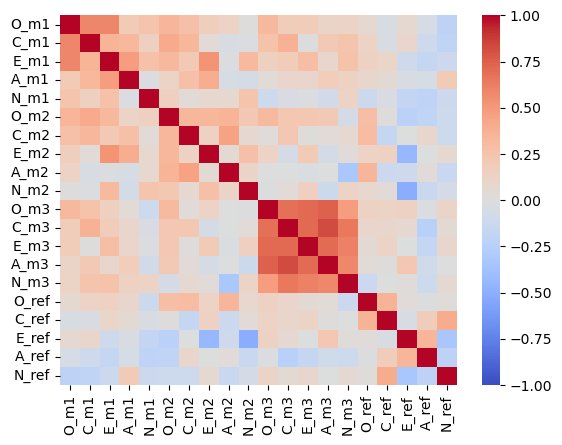

In [43]:
sns.heatmap(corr_df.corr(), cmap='coolwarm', annot=False, vmin=-1, vmax=1)


C:\Users\91875\AppData\Local\Temp\ipykernel_12040\3293967369.py:4: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\91875\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


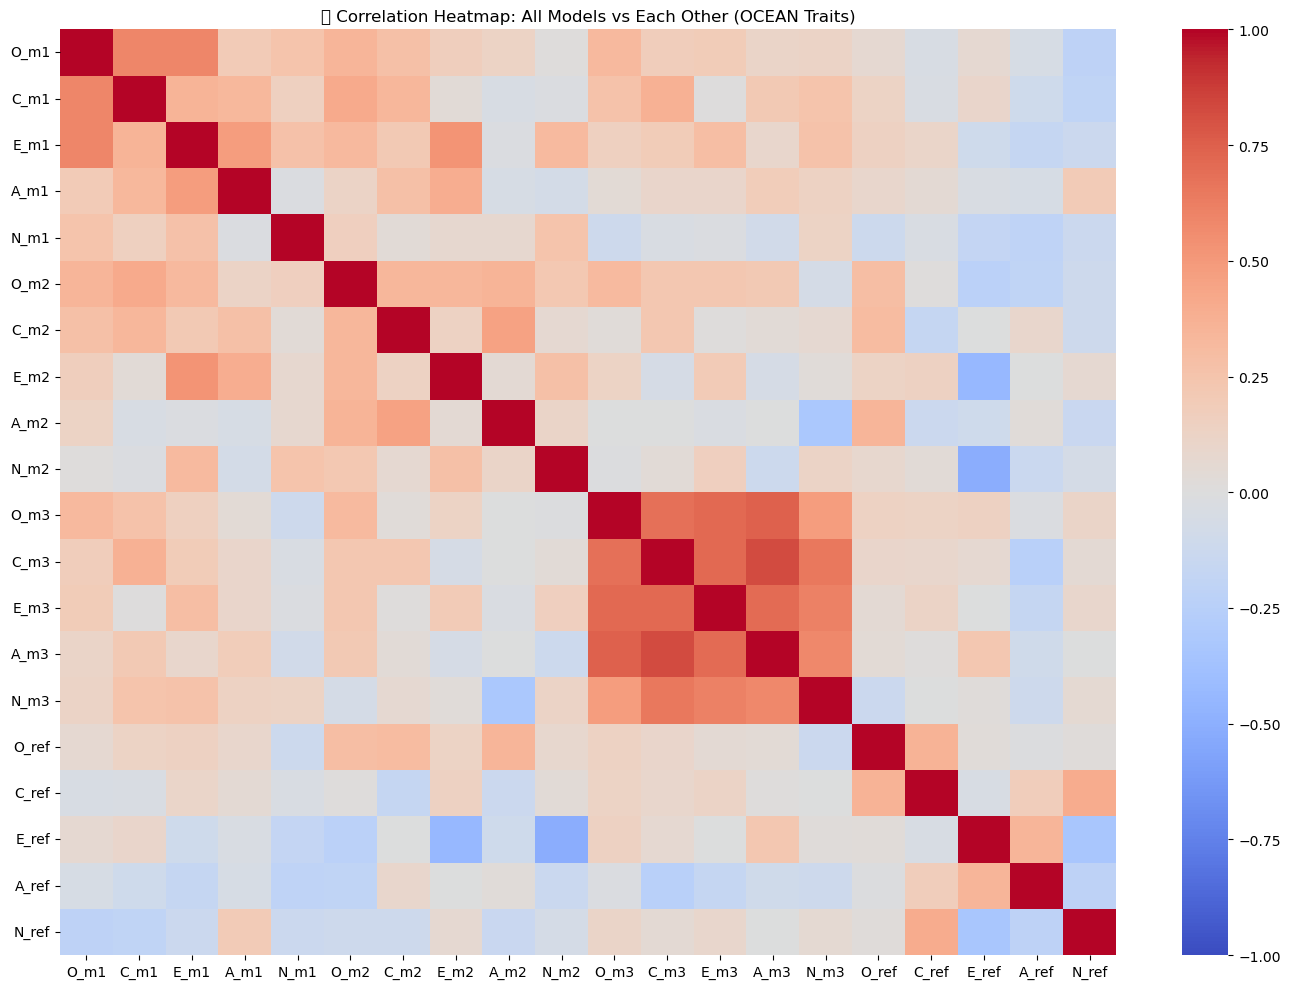

In [14]:
plt.figure(figsize=(14, 10))
sns.heatmap(corr_df.corr(), cmap='coolwarm', annot=False, vmin=-1, vmax=1)
plt.title('🔍 Correlation Heatmap: All Models vs Each Other (OCEAN Traits)')
plt.tight_layout()
plt.show()
